# Spaceship Titanic
#### Predict which passengers are transported to an alternate dimension
### Author :- Pavan Wanjari

### Data Description
In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.


#### Dataset Link:- https://www.kaggle.com/competitions/spaceship-titanic/data

<img src="Titanic.jpg" style= "width:400px; height:250px">


### Problem Summary

* We are in the year 2912 and a spaceship called Titanic started off from the Earth to emigrate about 13,000 passengers to three newly habitable exoplanets.
* Before reaching it's first destinantion it collided with a spacetime anomaly and almost half of the passengers were transported to an alternate dimension.
* To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

* Help save them and change history!



#### Steps

1. Import Libraries
2. Read Datasets
3. Data Exploration
4. Exploratory Data Analysis (EDA)
5. Data Cleaning
6. Data Scaling 
7. Model Building
8. Model Testing
9. Submission

### Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


### Read Dataset

In [2]:
df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### Data Exploration

In [5]:
# Check shape of data
df.shape

(8693, 14)

We can see here 8693 rows and 14 columns in dataset

In [6]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [7]:
# check basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
# check statistical description of dataset
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
# check any mmissing values present in dataset or not
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Here we can see null values present in dataset

In [10]:
# check unique values
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

### Exploratory Data Analysis (EDA)

### Data Visualization

* **Check correlation of features**


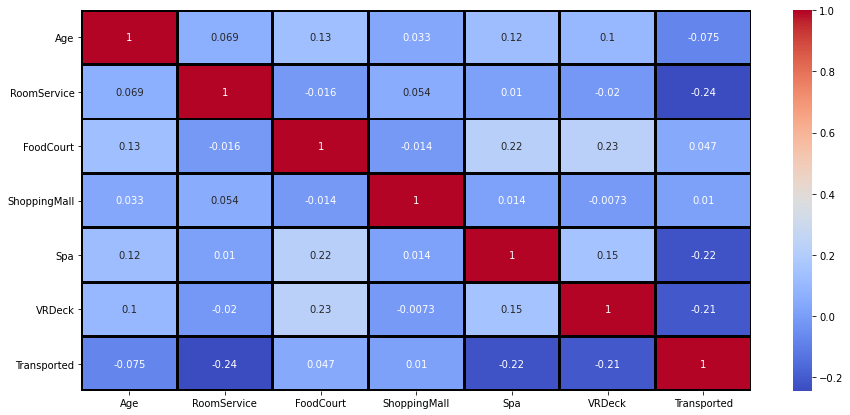

In [11]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=2, linecolor= "black")
plt.show()

From above Heatmap we see Some features have negative relation with our Dependent feature.

* **Categorical features**

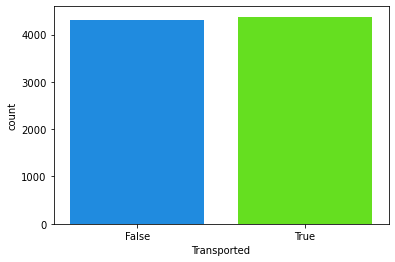

True     4378
False    4315
Name: Transported, dtype: int64

In [12]:
# Transported and not Transported
sns.countplot(df.Transported, palette="gist_rainbow_r")
plt.show()
df.Transported.value_counts()

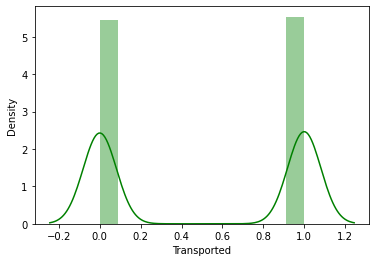

In [13]:
sns.distplot(df.Transported, color= "g")
plt.show()

From above plots we can see data is Balance

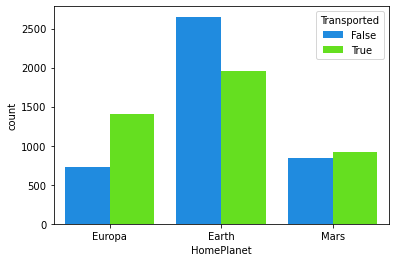

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [14]:
# Home Planet
sns.countplot(df.HomePlanet, hue= df.Transported, palette="gist_rainbow_r")
plt.show()
df.HomePlanet.value_counts()

Text(0.5, 1.0, 'Distribution of passengers from different home planets')

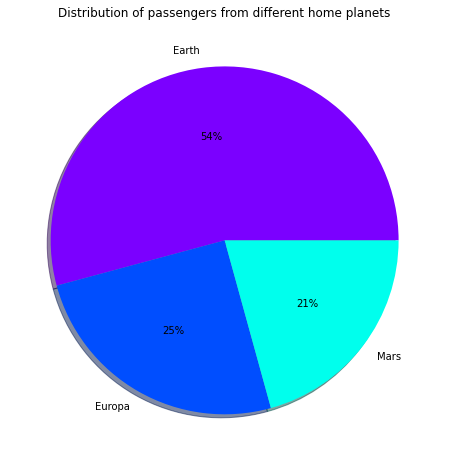

In [15]:
plt.figure(figsize=(10,8))
colors = sns.color_palette('gist_rainbow_r')
plt.pie(x = df.HomePlanet.value_counts().values, labels=df.HomePlanet.value_counts().index, colors=colors, shadow=True, autopct='%.0f%%',)
plt.title('Distribution of passengers from different home planets')

Counting shows **4602** from Earth, **2131** from Europa and **1759** from Mars. 

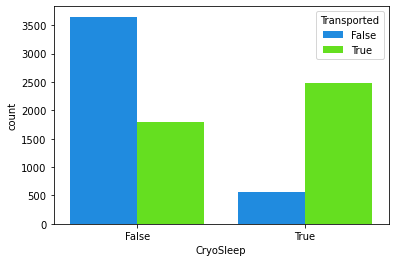

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [16]:
# CryoSleep 
sns.countplot(df.CryoSleep,  hue= df.Transported, palette='gist_rainbow_r')
plt.show()
df.CryoSleep.value_counts()

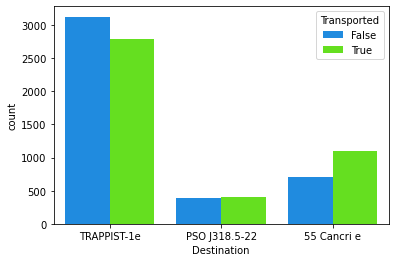

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [17]:
# Destination
sns.countplot(df.Destination,  hue= df.Transported, palette='gist_rainbow_r')
plt.show()
df.Destination.value_counts()

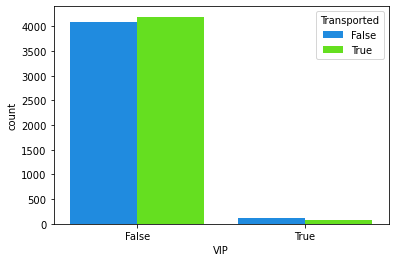

False    8291
True      199
Name: VIP, dtype: int64

In [18]:
# VIP 
sns.countplot(df.VIP,  hue= df.Transported, palette='gist_rainbow_r')
plt.show()
df.VIP.value_counts()

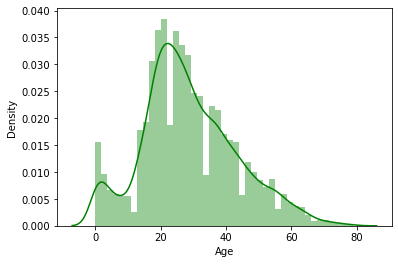

In [19]:
# age
sns.distplot(df.Age, color="g")
plt.show()

### Data cleaning

In [20]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

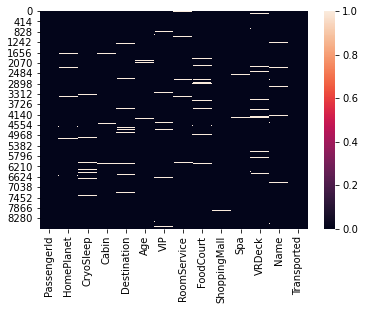

In [21]:
sns.heatmap(df.isnull())
plt.show()

In [22]:
df.isna().sum().sum() /df.shape[0] *100

26.73415391694467

26.73% data is missing

#### Filling Missing Data

In [23]:
#Filling missing values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")

df[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = pd.DataFrame(imp.fit_transform(df[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]))

imp_m = SimpleImputer(strategy="most_frequent")
df[['HomePlanet','CryoSleep','Cabin','Destination','VIP']] = pd.DataFrame(imp_m.fit_transform(df[['HomePlanet','CryoSleep','Cabin','Destination','VIP']]))

df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [24]:
X = df.drop(columns =['PassengerId','Name','Destination','Transported','Cabin'],axis = 1)
y = df['Transported']
X.head()

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,16.0,False,303.0,70.0,151.0,565.0,2.0


### Data Scalling

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# One Hot Encoding
X = pd.get_dummies(X,columns=['HomePlanet','CryoSleep','VIP'])

X[['RoomService','Age','FoodCourt', 'ShoppingMall','Spa','VRDeck']] = pd.DataFrame(scaler.fit_transform(
    X[['RoomService','Age','FoodCourt', 'ShoppingMall','Spa','VRDeck']]))
X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True
0,0.709437,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,0,1,0,1,0,1,0
1,-0.336717,-0.175364,-0.281669,-0.248968,0.211505,-0.230194,1,0,0,1,0,1,0
2,2.034566,-0.275409,1.955616,-0.290817,5.694289,-0.225782,0,1,0,1,0,0,1
3,0.290975,-0.340590,0.517406,0.330225,2.683471,-0.098708,0,1,0,1,0,1,0
4,-0.894666,0.118709,-0.243409,-0.038048,0.225732,-0.267258,1,0,0,1,0,1,0


## Model Building

### Import Models 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [27]:
# best best random state
maxacc = 0
maxRS = 0
for i in range(0, 500):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= i)
    lr= LogisticRegression()
    lr.fit(X_train, y_train)
    pred= lr.predict(X_test)
    acc= accuracy_score(y_test, pred)
    
    if acc > maxacc:
        maxacc = acc
        maxRs = i
        
print("Best sccuracy score is: ", maxacc, "On Random state : ", maxRS)

Best sccuracy score is:  0.8052147239263804 On Random state :  0


### Splitting Data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 0)

In [29]:
#Train
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)

#Test
print('X_test shape:',X_test.shape)
print('y_test:',y_test.shape)

X_train shape: (6085, 13)
y_train shape: (6085,)
X_test shape: (2608, 13)
y_test: (2608,)


### Logistic Regression

Logistic Regression Train Score:  78.96
Logistic Regression Test Score:  78.45
Logistic Regression Accuracy Score:  78.45


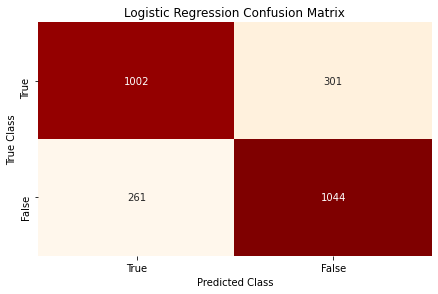

Classification Report:-
              precision    recall  f1-score   support

       False       0.79      0.77      0.78      1303
        True       0.78      0.80      0.79      1305

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



In [30]:
#Logistic Regression Model
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)


#Score
lr_TrainScore =  round(lr.score(X_train, y_train) * 100, 2)
lr_TestScore = round(lr.score(X_test, y_test) * 100, 2)
lr_accuracy = round(accuracy_score(y_test, lr_y_pred)*100, 2)

print('Logistic Regression Train Score: ', lr_TrainScore)
print('Logistic Regression Test Score: ', lr_TestScore)
print('Logistic Regression Accuracy Score: ', lr_accuracy)


#Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)
classes_names = ['True', 'False']
lr_ConfusionMatrix = pd.DataFrame(lr_cm, index=classes_names, columns=classes_names)

sns.heatmap(lr_ConfusionMatrix, annot=True, cbar=None, cmap="OrRd", fmt = 'g')

plt.title("Logistic Regression Confusion Matrix") 
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, lr_y_pred))

### Decision Tree

Decision Tree Train Score:  78.95
Decision Tree Test Score:  76.46
Decision Tree Accuracy Score:  76.46


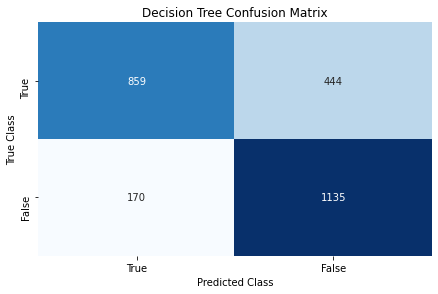

Classification Report:-
              precision    recall  f1-score   support

       False       0.83      0.66      0.74      1303
        True       0.72      0.87      0.79      1305

    accuracy                           0.76      2608
   macro avg       0.78      0.76      0.76      2608
weighted avg       0.78      0.76      0.76      2608



In [31]:
#Decision Tree Model
dtree = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=33) 
dtree.fit(X_train, y_train)
dtree_y_pred = dtree.predict(X_test)


#Score
dtree_TrainScore =  round(dtree.score(X_train, y_train) * 100, 2)
dtree_TestScore = round(dtree.score(X_test, y_test) * 100, 2)
dtree_accuracy = round(accuracy_score(y_test, dtree_y_pred)*100,2)

print('Decision Tree Train Score: ' , dtree_TrainScore)
print('Decision Tree Test Score: ' , dtree_TestScore)
print('Decision Tree Accuracy Score: ' , dtree_accuracy)



#Confusion Matrix
dtree_cm = confusion_matrix(y_test, dtree_y_pred)
dtree_ConfusionMatrix = pd.DataFrame(dtree_cm, index=classes_names, columns=classes_names)

sns.heatmap(dtree_ConfusionMatrix, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Decision Tree Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, dtree_y_pred))

### Random Forest

RandomForestModel Train Score:  79.13
RandomForestModel Test Score:  77.15
RandomForestModel Accuracy Score:  77.15


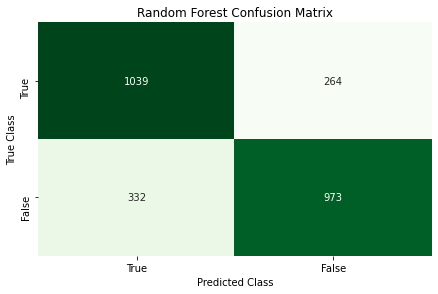

Classification Report:-
              precision    recall  f1-score   support

       False       0.76      0.80      0.78      1303
        True       0.79      0.75      0.77      1305

    accuracy                           0.77      2608
   macro avg       0.77      0.77      0.77      2608
weighted avg       0.77      0.77      0.77      2608



In [32]:
#Random Forest Model
rfc = RandomForestClassifier(criterion = 'gini',n_estimators=200,max_depth=5,random_state=33, n_jobs=-1)
rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_test)


#Score
rfc_TrainScore =  round(rfc.score(X_train, y_train) * 100, 2)
rfc_TestScore = round(rfc.score(X_test, y_test) * 100, 2)
rfc_accuracy = round(accuracy_score(y_test, rfc_y_pred)*100,2)

print('RandomForestModel Train Score: ' , rfc_TrainScore)
print('RandomForestModel Test Score: ' , rfc_TestScore)
print('RandomForestModel Accuracy Score: ' , rfc_accuracy)


#Confusion Matrix
rfc_cm = confusion_matrix(y_test, rfc_y_pred)
rfc_ConfusionMatrix = pd.DataFrame(rfc_cm, index=classes_names, columns=classes_names)

sns.heatmap(rfc_ConfusionMatrix, annot=True, cbar=None, cmap="Greens", fmt = 'g')
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, rfc_y_pred))

### Ada Boost Classifier

Ada Boost Classifier Train Score:  79.98
Ada Boost Classifier Test Score:  78.91
Ada Boost Classifier Accuracy Score:  78.91


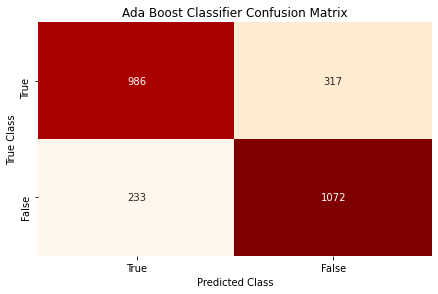

Classification Report:-
              precision    recall  f1-score   support

       False       0.81      0.76      0.78      1303
        True       0.77      0.82      0.80      1305

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



In [33]:
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)
adb_y_pred = adb.predict(X_test)


#Score
adb_TrainScore =  round(adb.score(X_train, y_train) * 100, 2)
adb_TestScore = round(adb.score(X_test, y_test) * 100, 2)
adb_accuracy = round(accuracy_score(y_test, adb_y_pred)*100,2)

print('Ada Boost Classifier Train Score: ', adb_TrainScore)
print('Ada Boost Classifier Test Score: ', adb_TestScore)
print('Ada Boost Classifier Accuracy Score: ', adb_accuracy)


#Confusion Matrix
adb_cm = confusion_matrix(y_test, adb_y_pred)
adb_ConfusionMatrix = pd.DataFrame(adb_cm, index=classes_names, columns=classes_names)

sns.heatmap(adb_ConfusionMatrix, annot=True, cbar=None, cmap="OrRd", fmt = 'g')
plt.title("Ada Boost Classifier Confusion Matrix") 
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, adb_y_pred))



### Naive Bayes 

Naive Bayes Classifier Train Score:  73.28
Naive Bayes Classifier Test Score:  71.28
Naive Bayes Classifier Accuracy Score:  71.28


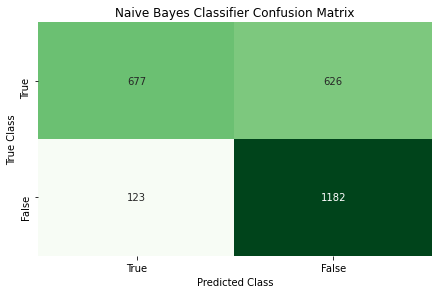

Classification Report:-
              precision    recall  f1-score   support

       False       0.85      0.52      0.64      1303
        True       0.65      0.91      0.76      1305

    accuracy                           0.71      2608
   macro avg       0.75      0.71      0.70      2608
weighted avg       0.75      0.71      0.70      2608



In [34]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_y_pred = gnb.predict(X_test)


#Score
gnb_TrainScore =  round(gnb.score(X_train, y_train) * 100, 2)
gnb_TestScore = round(gnb.score(X_test, y_test) * 100, 2)
gnb_accuracy = round(accuracy_score(y_test, gnb_y_pred)*100,2)

print('Naive Bayes Classifier Train Score: ', gnb_TrainScore)
print('Naive Bayes Classifier Test Score: ', gnb_TestScore)
print('Naive Bayes Classifier Accuracy Score: ', gnb_accuracy)


#Confusion Matrix
gnb_cm = confusion_matrix(y_test, gnb_y_pred)
gnb_ConfusionMatrix = pd.DataFrame(gnb_cm, index=classes_names, columns=classes_names)

sns.heatmap(gnb_ConfusionMatrix, annot=True, cbar=None, cmap="Greens", fmt = 'g')
plt.title("Naive Bayes Classifier Confusion Matrix") 
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, gnb_y_pred))


### XG Boost Classifier

[22:56:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost Classifier Train Score:  84.45
XG Boost Classifier Test Score:  78.68
XG Boost Classifier Accuracy Score:  78.68


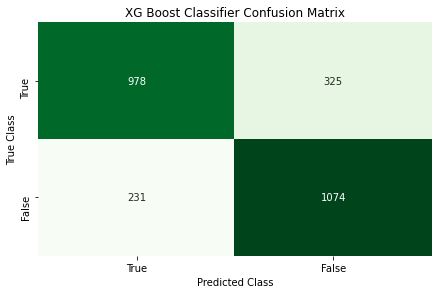

Classification Report:-
              precision    recall  f1-score   support

       False       0.81      0.75      0.78      1303
        True       0.77      0.82      0.79      1305

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)


#Score
xgb_TrainScore =  round(xgb.score(X_train, y_train) * 100, 2)
xgb_TestScore = round(xgb.score(X_test, y_test) * 100, 2)
xgb_accuracy = round(accuracy_score(y_test, xgb_y_pred)*100,2)

print('XG Boost Classifier Train Score: ', xgb_TrainScore)
print('XG Boost Classifier Test Score: ', xgb_TestScore)
print('XG Boost Classifier Accuracy Score: ', xgb_accuracy)


#Confusion Matrix
xgb_cm = confusion_matrix(y_test, xgb_y_pred)
xgb_ConfusionMatrix = pd.DataFrame(xgb_cm, index=classes_names, columns=classes_names)

sns.heatmap(xgb_ConfusionMatrix, annot=True, cbar=None, cmap="Greens", fmt = 'g')
plt.title("XG Boost Classifier Confusion Matrix") 
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

print("Classification Report:-")
print(  classification_report(y_test, xgb_y_pred))



### Analysing different models

In [36]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Ada Boost Classifier', 'Naive Bayes','XG Boost Classifier'],
    'Accuracy Score': [lr_accuracy, dtree_accuracy, rfc_accuracy, adb_accuracy, gnb_accuracy, xgb_accuracy]})

models.sort_values(['Accuracy Score'], ascending=[False])

,Model,Accuracy Score
3,Ada Boost Classifier,78.91
5,XG Boost Classifier,78.68
0,Logistic Regression,78.45
2,Random Forest,77.15
1,Decision Tree,76.46
4,Naive Bayes,71.28


**Accuracy of Ada Boost Classifier is 78.91% better than other models.**

### ROC curve

<Figure size 720x504 with 0 Axes>

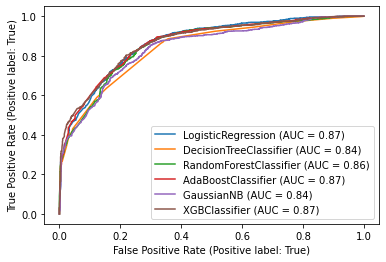

In [37]:
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(10,7))
fig = plot_roc_curve(lr, X_test, y_test)
fig = plot_roc_curve(dtree, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(rfc, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(adb, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(gnb, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(xgb, X_test, y_test, ax = fig.ax_)

plt.show()

### Test Data

In [38]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [39]:
test_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [40]:
# Check shape of data
test_df.shape

(4277, 13)

In [41]:
# check basic info 
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [42]:
# check Statistical summary of dataset
test_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [43]:
# check any mmissing values present in dataset or not
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

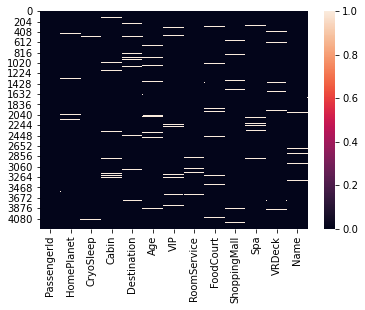

In [44]:
sns.heatmap(test_df.isnull())
plt.show()

In [45]:
test_df.isna().sum().sum() /df.shape[0] *100

12.84941907281721

In [46]:
test_df[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = pd.DataFrame(imp.fit_transform(test_df[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]))

imp_m = SimpleImputer(strategy="most_frequent")
test_df[['HomePlanet','CryoSleep','Cabin','Destination','VIP']] = pd.DataFrame(imp_m.fit_transform(test_df[['HomePlanet','CryoSleep','Cabin','Destination','VIP']]))

test_df.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
dtype: int64

In [47]:
new_test_df = test_df.drop(columns =['PassengerId','Name','Destination','Cabin'],axis = 1)
new_test_df.head()

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,20.0,False,10.0,0.0,635.0,0.0,0.0


In [48]:
# One Hot Encoding
new_test_df = pd.get_dummies(new_test_df,columns=['HomePlanet','CryoSleep','VIP'])

new_test_df[['RoomService','Age','FoodCourt', 'ShoppingMall','Spa','VRDeck']] = pd.DataFrame(scaler.fit_transform(
    new_test_df[['RoomService','Age','FoodCourt', 'ShoppingMall','Spa','VRDeck']]))
new_test_df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True
0,-0.118222,-0.364780,-0.291352,-0.319859,-0.274558,-0.251561,1,0,0,0,1,1,0
1,-0.688601,-0.364780,-0.285385,-0.319859,2.283008,-0.251561,1,0,0,1,0,1,0
2,0.166968,-0.364780,-0.291352,-0.319859,-0.274558,-0.251561,0,1,0,0,1,1,0
3,0.666051,-0.364780,4.118523,-0.319859,-0.110576,0.222074,0,1,0,1,0,1,0
4,-0.617304,-0.348143,-0.291352,0.825745,-0.274558,-0.251561,1,0,0,1,0,1,0


### Model Testing

In [49]:
#predicted Transported for test data
new_test_df['Transported']=adb.predict(new_test_df)
new_test_df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True,Transported
0,-0.118222,-0.364780,-0.291352,-0.319859,-0.274558,-0.251561,1,0,0,0,1,1,0,True
1,-0.688601,-0.364780,-0.285385,-0.319859,2.283008,-0.251561,1,0,0,1,0,1,0,False
2,0.166968,-0.364780,-0.291352,-0.319859,-0.274558,-0.251561,0,1,0,0,1,1,0,True
3,0.666051,-0.364780,4.118523,-0.319859,-0.110576,0.222074,0,1,0,1,0,1,0,True
4,-0.617304,-0.348143,-0.291352,0.825745,-0.274558,-0.251561,1,0,0,1,0,1,0,False


### Submission

In [50]:
sub = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Transported': new_test_df['Transported']})
sub.to_csv('submission.csv', index=False)
sub.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


### Model Created Successfully